In this section, various anomaly detection methods are examined based on the dataset. The data come without labels, so there is no knowledge or classification rule is provided to distinguish between “system faults”, “external events” and others.

Any details of the instrument and experiments are not provided either. Therefore, my results in this section might deviate from expectations, but I am trying my best to make assumptions, define problems, and then accomplish them based on my personal experience. The section consists of three parts: Point Anomaly Detection, Collective Anomaly Detection, and Clustering.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Data Preparation

In [4]:
# Load dataframes from pickle files
with open('data/data_full.pkl', 'rb') as f:
    data, data_norm = pickle.load(f)

In [5]:
data.head()

,Ozone - Low Conc.,Hydrogen Sulfide - Low Conc.,Total VOCs (ppm) - PID,Carbon Dioxide - Low Conc.,Particulate Matter 1,Particulate Matter 2.5,Particulate Matter 10,Temperature (Internal),Humidity (Internal),Temperature (External),Humidity (External)
Timestamp,,,,,,,,,,,
2020-05-26 08:51:45-04:00,0.210,0.000,0.266,466.607,18.270,19.519,19.759,23.87,45.76,23.25,47.54
2020-05-26 08:52:44-04:00,0.217,0.001,0.268,467.189,14.326,15.149,15.149,23.81,45.93,23.18,47.75
2020-05-26 08:53:44-04:00,0.222,0.001,0.269,468.038,10.830,11.453,11.453,23.91,45.94,23.25,47.84
2020-05-26 08:54:44-04:00,0.209,0.001,0.270,473.823,11.914,12.798,13.038,23.85,45.89,23.31,47.87
2020-05-26 08:55:43-04:00,0.208,0.001,0.269,477.804,13.232,13.992,13.992,24.00,46.43,23.29,47.91


In [8]:
data_norm.head()

,Ozone - Low Conc.,Hydrogen Sulfide - Low Conc.,Total VOCs (ppm) - PID,Carbon Dioxide - Low Conc.,Particulate Matter 1,Particulate Matter 2.5,Particulate Matter 10,Temperature (Internal),Humidity (Internal),Temperature (External),Humidity (External)
Timestamp,,,,,,,,,,,
2020-05-26 08:51:45-04:00,-0.566667,0.000,2.95122,2.292670,3.327446,3.273500,3.281005,-6.750000,-0.155439,-0.108545,-0.077844
2020-05-26 08:52:44-04:00,-0.537500,0.001,3.00000,2.304475,2.404819,2.321534,2.277959,-6.964286,-0.146296,-0.124711,-0.066798
2020-05-26 08:53:44-04:00,-0.516667,0.001,3.02439,2.321696,1.586993,1.516393,1.473782,-6.607143,-0.145758,-0.108545,-0.062064
2020-05-26 08:54:44-04:00,-0.570833,0.001,3.04878,2.439036,1.840575,1.809389,1.818647,-6.821429,-0.148447,-0.094688,-0.060487
2020-05-26 08:55:43-04:00,-0.575000,0.001,3.02439,2.519784,2.148898,2.069491,2.026218,-6.285714,-0.119403,-0.099307,-0.058383


## Point Anomaly Detection

Point anomalies, or global outliers, are those data points that are entirely outside the scope of the usual signals without any support of close neighbors. It is usually caused by human or system error and needs to be removed during data cleaning for better performance in predictive modeling. In this dataset, by assuming the “system faults” are equivalent to such point anomalies, there are several features that are worth examining, such as the examples shown below.


In [6]:
def is_outlier(data, rolling_median, thresh):
    return abs(data - rolling_median) >= thresh

In [7]:
# Label the outliers
data_nrm5 = data_norm.rolling(5, center=True).median()
labels = is_outlier(data_norm, data_nrm5, 0.17).astype('int')

## Visualization

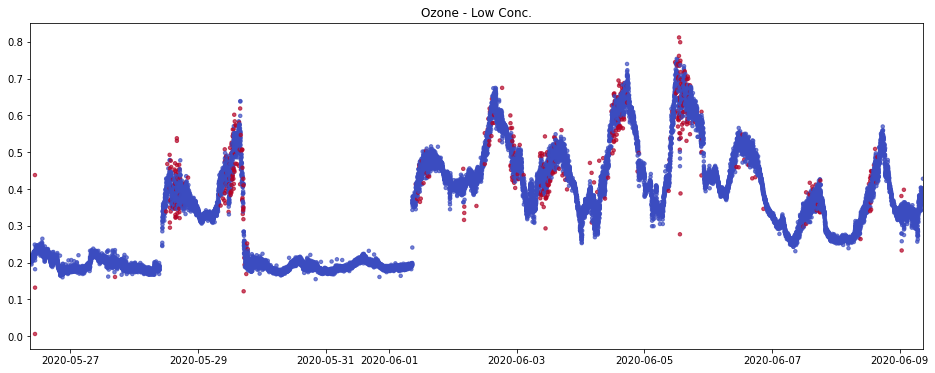

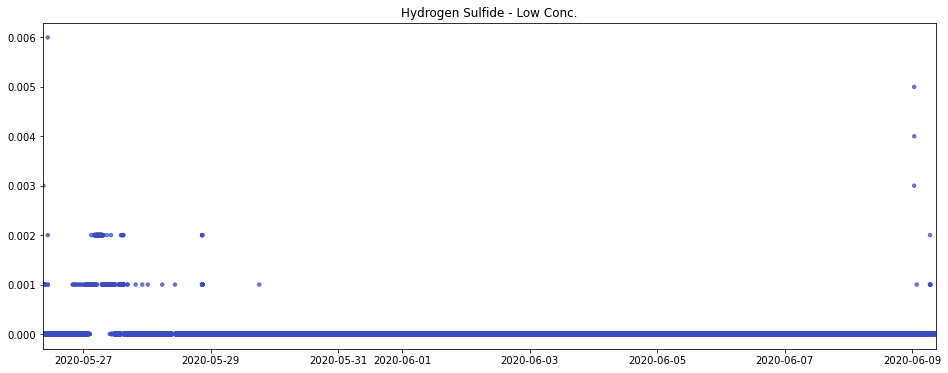

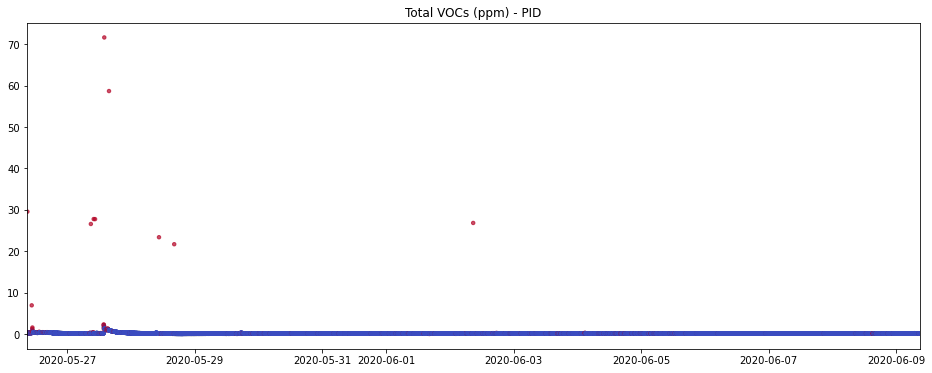

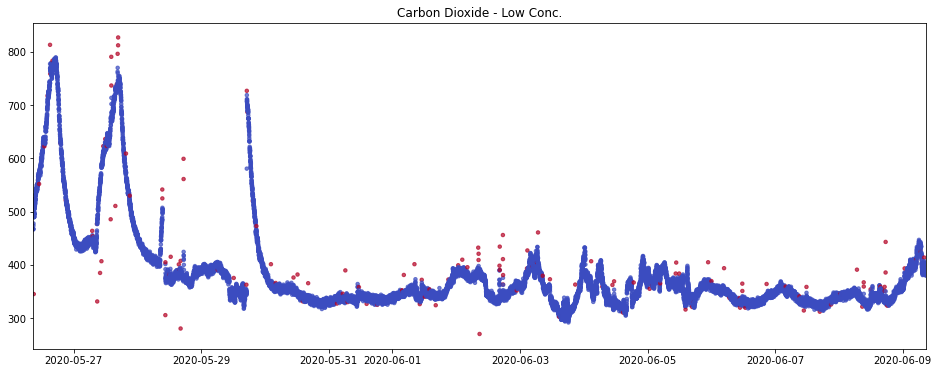

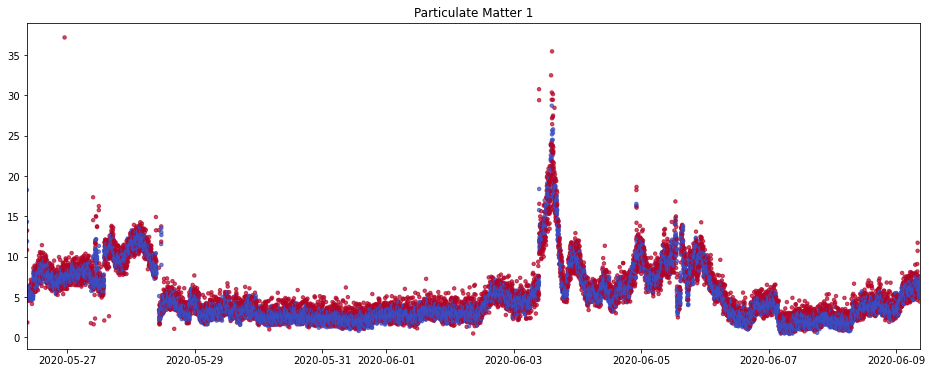

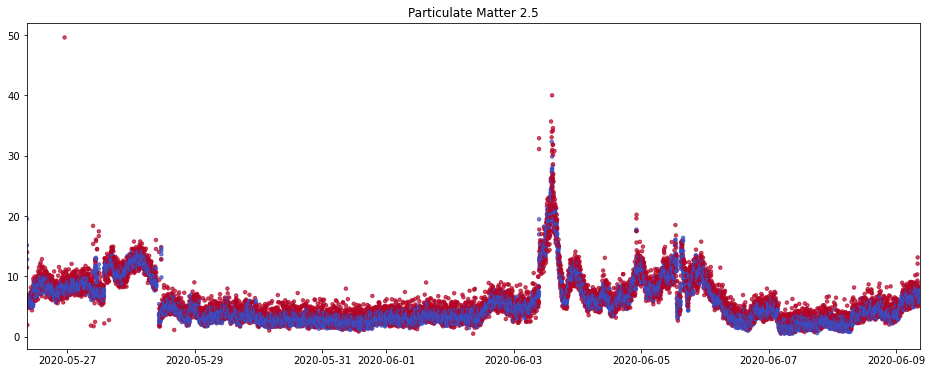

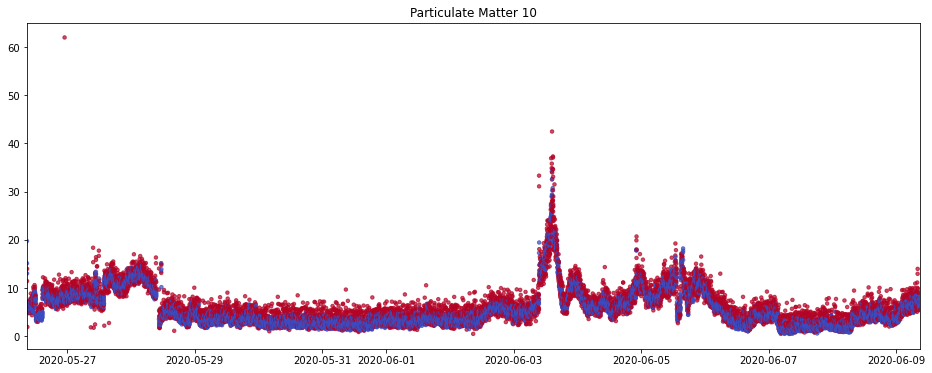

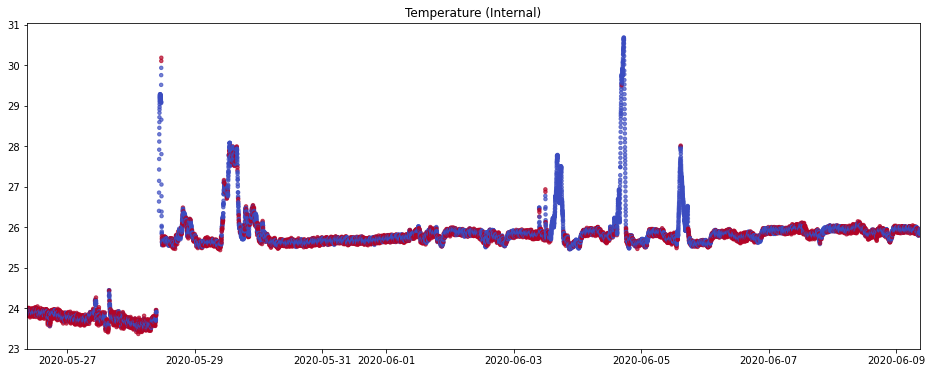

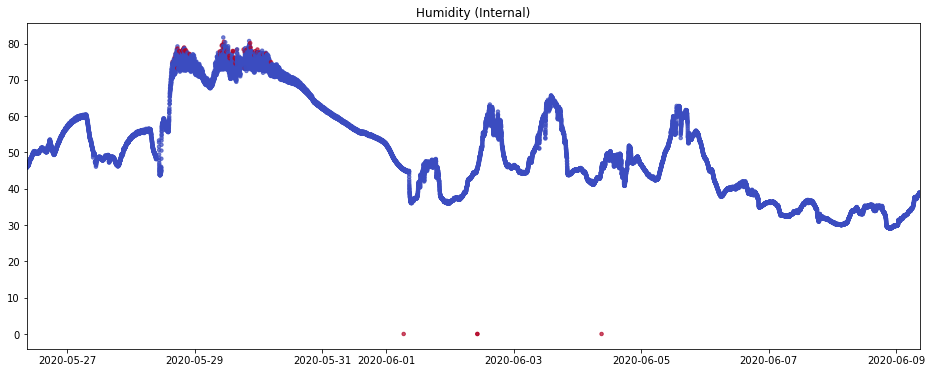

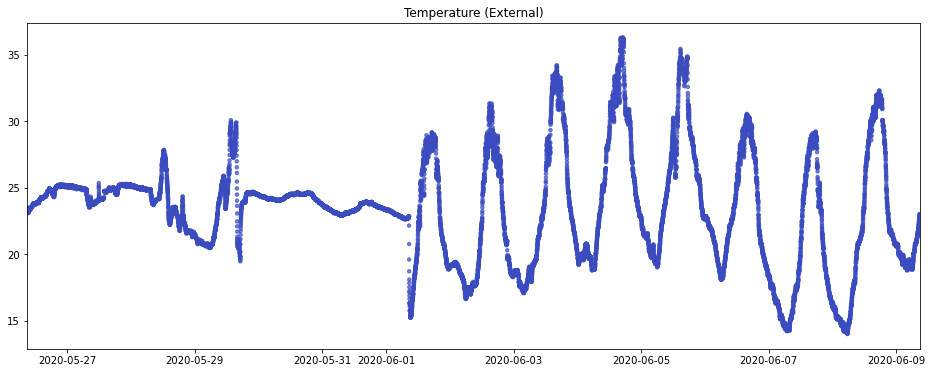

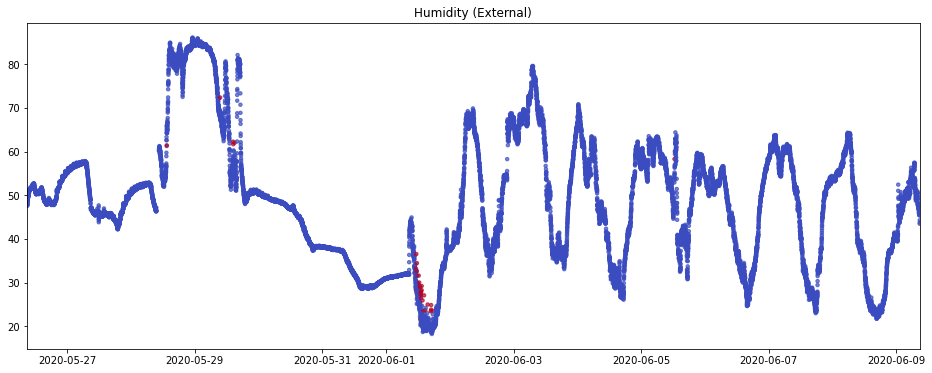

In [9]:
# Plot each of the time series data with outliers labeled
for col in data.columns:
    fig, ax = plt.subplots(figsize=(16, 6))
    plt.scatter(data.index, data[col], c=labels[col], s=12, alpha=0.7, cmap=plt.get_cmap('coolwarm'))
    plt.xlim([data.index[0], data.index[-1]])
    plt.title(col)
plt.show()

Here, from Humidity (Internal) to Total VOC to Carbon Dioxide, each represents a distinct complexity of point anomaly detection tasks. In the first one, three outliers sit on the level of 0, so a simple boolean filter can do its job of flagging these data points. In the second one, the outliers deviate significantly from the signal that we are interested in, so linear thresholds can be used to separate out the outliers. Both cases are easy to implement because they can be done by purely experience-based methods. When it comes to the third case, it is not possible to use a linear threshold to separate out the outliers since even if they deviate from its neighbors, the values may not be as great as the usual signals at other time points.

C:\Users\DATASC~1\AppData\Local\Temp/ipykernel_42320/484654493.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick, rotation=30)


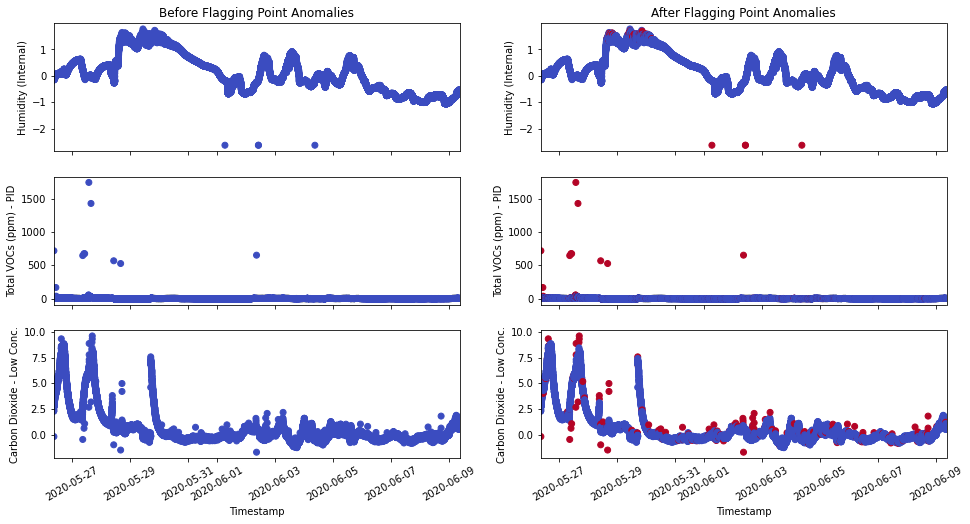

In [10]:
# Comparison of selected time series
tick = ax.get_xticklabels()
ind = [8, 2, 3]
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(16, 8))
axs[0][0].set_title('Before Flagging Point Anomalies')
axs[0][1].set_title('After Flagging Point Anomalies')
for i in range(3):
    series, label = data_norm.iloc[:, ind[i]], labels.iloc[:, ind[i]]
    c = [np.zeros(len(series)), label]
    for j in range(2):
        ax = axs[i][j]
        ax.scatter(series.index, series, c=c[j], cmap=plt.get_cmap('coolwarm'))
        ax.set_xlim(series.index[0], series.index[-1])
        ax.set_ylabel(data_norm.columns[ind[i]])
for j in range(2):
    ax = axs[2][j]
    ax.set_xticklabels(tick, rotation=30)
    ax.set_xlabel('Timestamp')
plt.show()

For such cases, there are many ways to approach. One of the simple ways is to calculate the rolling mean or median at each time point and test if the actual value is within the prediction interval that is calculated by adding and subtracting a certain fluctuation range from the central line. Since we are dealing with outliers in our case, the rolling median is more robust, so it is used in this dataset.

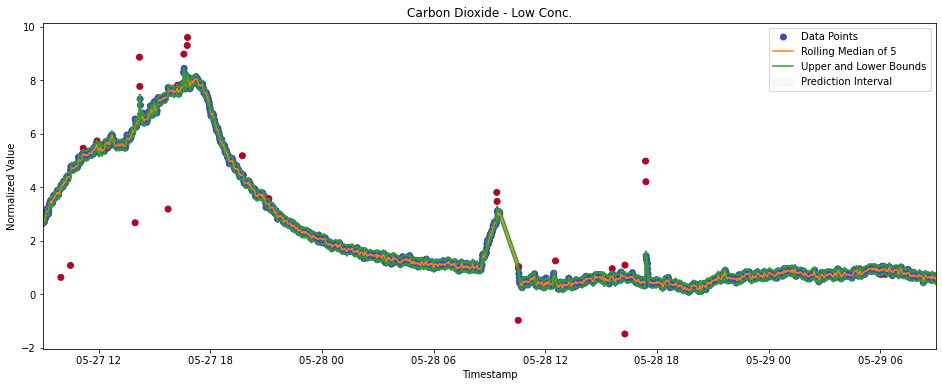

In [11]:
# Zoomed-in scatter plot of Carbon Dioxide, with labeled outliers and prediction interval
t = ['2020-05-27 09:00:00-04:00', '2020-05-29 9:00:00-04:00']
series = data_norm['Carbon Dioxide - Low Conc.']
series = series.loc[(series.index > t[0]) & (series.index < t[1])]
label = labels['Carbon Dioxide - Low Conc.']
label = label.loc[(label.index > t[0]) & (label.index < t[1])]
series_nrm5 = data_nrm5['Carbon Dioxide - Low Conc.']
series_nrm5 = series_nrm5.loc[(series_nrm5.index > t[0]) & (series_nrm5.index < t[1])]
fig, ax = plt.subplots(figsize=(16, 6))
plt.scatter(series.index, series, c=label, cmap=plt.get_cmap('coolwarm'), label='Data Points')
plt.plot(series_nrm5.index, series_nrm5, color='tab:orange', label='Rolling Median of 5')
plt.plot(series_nrm5.index, series_nrm5+0.17, color='tab:green', label='Upper and Lower Bounds')
plt.plot(series_nrm5.index, series_nrm5-0.17, color='tab:green')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5+0.17, color='tab:green', alpha=0.05, label='Prediction Interval')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5-0.17, color='tab:green', alpha=0.05)
plt.xlim(series.index[0], series.index[-1])
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')
plt.title('Carbon Dioxide - Low Conc.')
plt.show()

From Figure 4, it is even clearer to demonstrate this approach: Equal-distance prediction intervals are set based on the rolling median. Here, the rolling window is set to 5, which means that for each data point, we take four of its closest neighbors and calculate the median as the center of prediction. Then a prediction interval of ±0.17 is padded around the center. Any points outside are considered as outliers.


It is straightforward and efficient to detect the point anomalies using this approach. However, it has deficiencies and may not be reliable enough to deal with more complex data. In this model, there are two parameters: rolling window size and prediction interval size, both of which are defined manually through experimentations with the given data. We are essentially solving the problem encountered when going from case 2 to case 3 as seen in Figure 3 by enabling the self-adjusting capability to the classification boundary between signal and outliers according to time. However, the bandwidth is fixed, so it becomes less useful in cases when the definition of point anomalies changes with time. For example, the definition of a super cheap flight ticket might be totally different between a normal weekday and the holiday season.


That is when machine learning comes into play, where the model can learn from the data to adjust the parameters by itself when the time changes. It will know when a data point can be classified as point anomaly or not at a specific time point. However, I cannot construct such a supervised machine learning model on this task for this dataset since the premise is to have labeled data, and ours is not. It would be still be suggested to go along this path in the future because with such a model, the most accurate results will be generated no matter how complex the system or the data are.


Even though supervised learning methods would not work in this task, there are unsupervised learning techniques that can be useful such as clustering, also discussed in subsection 3.3. Clustering can group unlabeled data by using similarity measures, such as the distance between data points in the vector space. Then the point anomalies can be distinguished by selecting those far away from cluster centers. However, in order to use clustering for point anomaly detection in this dataset, we have to follow the assumption that external events are defined with the scope of multiple features instead of treating every single time series separately. More details on this are discussed in the following two subsections 3.2 and 3.3.